In [1]:
import altair as alt
import pandas as pd
import ppscore as pps
import pygwalker as pyg


PENGUINS = "https://github.com/EAISI/discover-projects/blob/main/palmer-penguins/penguins.csv?raw=true"
df = pd.read_csv(PENGUINS)

In [2]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


<Axes: ylabel='Frequency'>

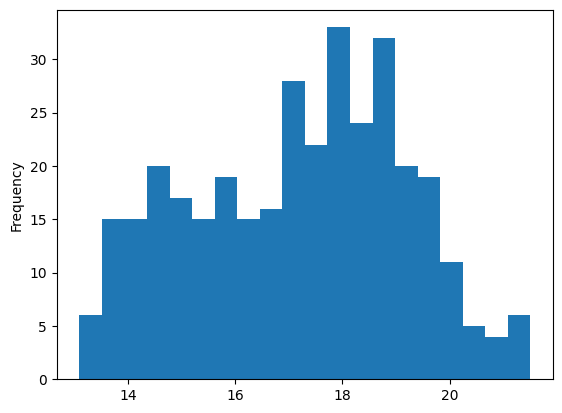

In [4]:
df["bill_depth_mm"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

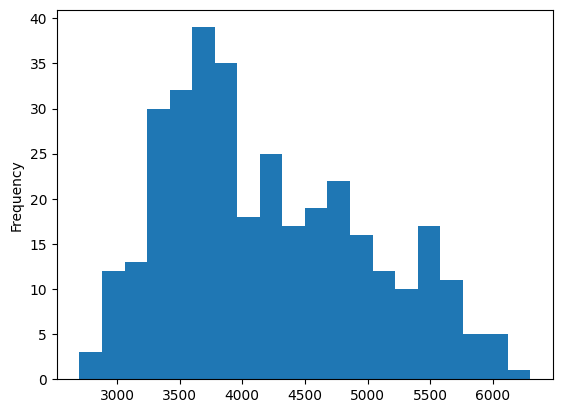

In [5]:
df["body_mass_g"].plot.hist(bins=20)

In [6]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-00061276b0268b1bwHmqKapvg9zEJj1S" style="height: auto">\n    <head>…

In [9]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Unnamed: 0,Unnamed: 0,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Unnamed: 0,species,0.990786,classification,True,weighted F1,0.366279,0.994161,DecisionTreeClassifier()
2,Unnamed: 0,island,0.957282,classification,True,weighted F1,0.383721,0.973674,DecisionTreeClassifier()
3,Unnamed: 0,bill_length_mm,0.150212,regression,True,mean absolute error,4.701462,3.995246,DecisionTreeRegressor()
4,Unnamed: 0,bill_depth_mm,0.097025,regression,True,mean absolute error,1.657018,1.496245,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
76,year,bill_depth_mm,0.006787,regression,True,mean absolute error,1.657018,1.645771,DecisionTreeRegressor()
77,year,flipper_length_mm,0.000000,regression,True,mean absolute error,11.897661,12.017100,DecisionTreeRegressor()
78,year,body_mass_g,0.000000,regression,True,mean absolute error,666.374269,675.657360,DecisionTreeRegressor()
79,year,sex,0.000000,classification,True,weighted F1,0.543544,0.421438,DecisionTreeClassifier()


In [13]:
pps_matrix = (
    pps.matrix(df)
    .loc[:, ["x", "y", "ppscore"]]
)
(
    alt.Chart(pps_matrix)
    .mark_rect()
    .encode(
        x="x:O",
        y="y:O",
        color="ppscore:Q",
        tooltip=["x", "y", "ppscore"])
    .properties(width=700, height=700)
)

alt.Chart(...)